In [ ]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 데이터 불러오기
cols = ['vendor', 'model', 'MYCT', 'MMIN', 'MMAX','CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
df = pd.read_csv("/content/machine.data", names=cols)

# 필요없는 컬럼 제거
X = df.drop(['vendor', 'model', 'ERP'], axis=1)
y = df['PRP']


scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# 트레인 테스트 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

earlystop = EarlyStopping(monitor='val_loss', patience=20)

# test1
model1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(20, activation='relu'),
    Dense(40, activation='relu'),
    Dense(40, activation='relu'),
    Dense(1)
])
model1.compile(optimizer='adam', loss='mse')
history1 = model1.fit(X_train, y_train,
                      validation_split=0.25, epochs=2000, batch_size=32, callbacks=[earlystop], verbose=0)
score1 = model1.evaluate(X_test, y_test, verbose=0)
print("MSE 1:", round(score1, 4))

# Test2
model2 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(30, activation='relu'),
    Dense(60, activation='relu'),
    Dense(30, activation='relu'),
    Dense(1)
])
model2.compile(optimizer='adam', loss='mean_squared_error')
model2.fit(X_train, y_train,
           epochs=2000,
           batch_size=50,
           validation_split=0.25,
           callbacks=[earlystop],
           verbose=0)
score2 = model2.evaluate(X_test, y_test, verbose=0)
print("MSE 2:", round(score2, 4))

# Test3
model3 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(40, activation='relu'),
    Dense(40, activation='relu'),
    Dense(20, activation='relu'),
    Dense(1)
])
model3.compile(optimizer='adam', loss='mse')
history3 = model3.fit(X_train, y_train, batch_size=64, epochs=2000,
                      validation_split=0.25, callbacks=[EarlyStopping(patience=20)], verbose=0)
final_score = model3.evaluate(X_test, y_test, verbose=0)
print(f"Test3: {final_score:.4f}")


MSE 1: 2998.408
MSE 2: 3887.5261
Test3: 3869.6541


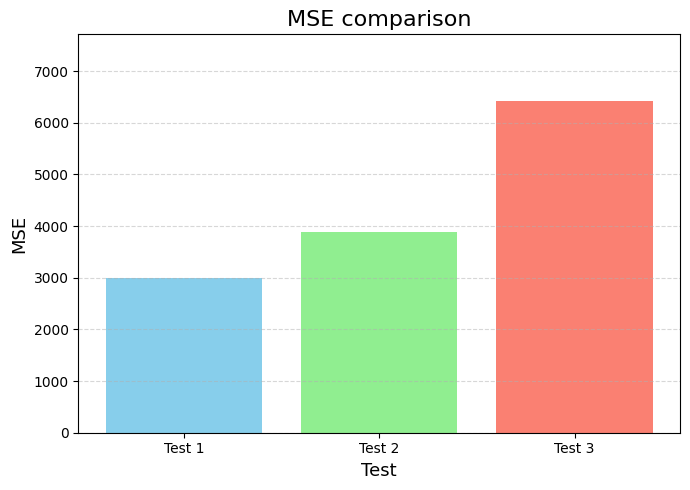

In [ ]:
import matplotlib.pyplot as plt
results = pd.DataFrame({
    'Experiment': ['Test 1', 'Test 2', 'Test 3'],
    'MSE': [score1, score2, score3]
})

plt.figure(figsize=(7, 5))
bars = plt.bar(results['Experiment'], results['MSE'], color=['skyblue', 'lightgreen', 'salmon'])


plt.title('MSE comparison', fontsize=16)
plt.xlabel('Test', fontsize=13)
plt.ylabel('MSE', fontsize=13)
plt.ylim(0, max(results['MSE']) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()